In [2]:
from numpy import isnan
import numpy as np
import pandas as pd
from numpy import percentile
# from pandas import read_csv
from sklearn.impute import SimpleImputer
# load dataset
dataframe = pd.read_csv('df')
dataframe.head(20)

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [3]:
dataframe.shape

(1460, 82)

In [52]:
# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]
print('Missing: %d' % sum(isnan(X).flatten()))# summarize total missing
# define imputer
imputer = SimpleImputer(strategy= 'mean ' )
# fit on the dataset
imputer.fit(X)
# transform the dataset
Xtrans = imputer.transform(X)
# summarize total missing
print('Missing: %d' % sum(isnan(Xtrans).flatten()))

IndexError: index 23 is out of bounds for axis 1 with size 11

In [53]:
column_with_nan = dataframe.columns[dataframe.isnull().any()]
dataframe.shape
for column in column_with_nan:
    print(column, dataframe[column].isnull().sum())


for column in column_with_nan:
        if dataframe[column].isnull().sum()*100.0/dataframe.shape[0] > 50:
            dataframe.drop(column,axis=1, inplace=True)

In [54]:
dataframe.shape

(66, 11)

70.04995836802665

In [29]:
# dataframe = pd.DataFrame(dataframe)

39

In [7]:
dataframe.dtypes

Unnamed: 0         int64
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 82, dtype: object

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


<AxesSubplot:ylabel='None'>

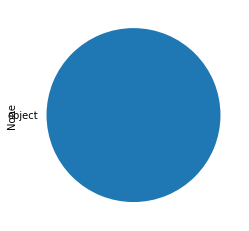

In [6]:
dataframe.dtypes.value_counts().plot.pie()

In [62]:
pd.to_numeric(dataframe["MSSubClass"])
dataframe["MSSubClass"].dtypes

dtype('int64')

# Outliers

In [19]:
dataframe = dataframe.apply(pd.to_numeric)
# pd.to_numeric(dataframe[1])
dataframe["PH"].dtypes

dtype('float64')

['PH', 'T', 'CE', 'O2', 'NH', 'NO', 'SO', 'PO', 'DBO5', 'IQE', 'Classe']

In [46]:
Features_list = dataframe.columns.to_list()
Features_list
def outliers(data,ft):
    Q1, Q3 = percentile(data[ft], 25), percentile(data[ft], 75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    ls = data.index[(data[ft]<lower) | (data[ft]>upper)]
    return ls

index_list = []
for feature in Features_list:
    index_list.extend(outliers(dataframe,feature))

sorted(set(index_list))

[5, 11, 15, 27, 33, 37, 41, 49, 55, 59]

In [42]:
def remove(data,ls):
    ls = sorted(set(ls))
    data = data.drop(ls)
    return data


In [43]:
data_cleaned = remove(dataframe,index_list)

In [44]:
data_cleaned.shape

(56, 11)

In [48]:
len(index_list)

39

# Imputation

by Mean

In [27]:
numeric_columns = dataframe.select_dtypes(exclude=['object']).columns
numeric_columns
# np.mean(dataframe["LotFrontage"])

for col in numeric_columns:
    # print(np.mean(dataframe[col]))
    dataframe[col].fillna(round(np.mean(dataframe[col]),1),inplace=True)
    
# dataframe[numeric_columns].head(20)
# dataframe["LotFrontage"].isnull().sum()


0

by median

In [31]:
dataframe = pd.read_csv('df')
numeric_columns = dataframe.select_dtypes(exclude=['object']).columns
numeric_columns

Index(['Unnamed: 0', 'Id', 'MSSubClass', 'LotFrontage', 'LotArea',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [34]:

for col in numeric_columns:
    print(np.median(dataframe[col]))
    # dataframe[col].fillna(round(np.median(dataframe[col]),1),inplace=True)

# dataframe[numeric_columns].head(20)

729.5
730.5
50.0
nan
9478.5
6.0
5.0
1973.0
1994.0
nan
383.5
0.0
477.5
991.5
1087.0
0.0
0.0
1464.0
0.0
0.0
2.0
0.0
3.0
1.0
6.0
1.0
nan
2.0
480.0
0.0
25.0
0.0
0.0
0.0
0.0
0.0
6.0
2008.0
163000.0
